## Task-1: AI-Powered Sales Forecasting Dashboard 📈

This project focuses on **sales forecasting using time series analysis**.  
Using historical sales data from the **Sample Superstore dataset**, we apply the **Prophet forecasting model** to predict future sales trends.

📌The **objective** is to:
- Analyze historical sales patterns
- Forecast future sales
- Visualize insights using an interactive Power BI dashboard

## 🔧 Importing Required Libraries

In this step, we import all the necessary Python libraries used for:
- Data manipulation (`pandas`)
- Visualization (`matplotlib`)
- Time series forecasting (`Prophet`)
- Model evaluation (`scikit-learn`)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

## 📂 Loading the Dataset

The **Sample Superstore dataset** is loaded into a pandas DataFrame.  
This dataset contains transactional sales records including order date, sales amount, category, and region.

We will primarily use:
- `Order Date` → Time component
- `Sales` → Target variable


In [5]:
df = pd.read_csv("sample.csv")
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  06-12-2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

## 🧹 Data Cleaning and Date Conversion

Before performing time series analysis, it is important to:
- Convert the `Order Date` column into datetime format
- Ensure consistency in date values

This step is critical because the forecasting model requires a valid datetime index.


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='mixed')


## 📊 Aggregating Sales by Date

The dataset contains multiple sales transactions per day.  
To prepare the data for time series forecasting, we aggregate total sales **per day**.

This converts raw transactional data into a proper time series format where:
- Each row represents one day
- Each value represents total daily sales


In [7]:
daily_sales = (
    df
    .groupby('Order Date')['Sales']
    .sum()
    .reset_index()
)


## 🔁 Preparing Data for Prophet Model

Prophet requires the dataset to follow a specific format:
- `ds` → Date column
- `y` → Target variable (sales)

In this step, we rename the columns accordingly to make the data compatible with the Prophet model.


In [8]:
prophet_df = daily_sales.rename(columns={
    'Order Date': 'ds',
    'Sales': 'y'
})


## 📈 Exploratory Data Analysis (EDA)

A line plot is created to visualize historical sales trends over time.

This helps in identifying:
- Overall trend (increasing or decreasing)
- Seasonal patterns
- Sudden spikes or drops in sales


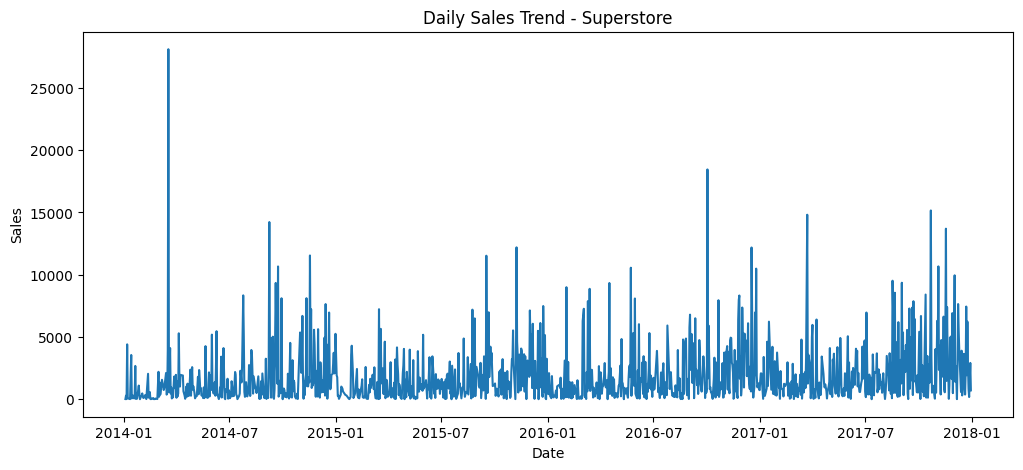

In [9]:
plt.figure(figsize=(12,5))
plt.plot(prophet_df['ds'], prophet_df['y'])
plt.title("Daily Sales Trend - Superstore")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


## 🤖 Building the Forecasting Model

The Prophet model is initialized with:
- Yearly seasonality enabled
- Weekly seasonality enabled
- Daily seasonality disabled

These settings are chosen based on the nature of sales data, which typically shows weekly and yearly patterns.


In [10]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)


## 🧠 Training the Model

The Prophet model is trained using historical sales data.  
During this step, the model learns:
- Long-term trends
- Weekly and yearly seasonal effects
- Noise in the data


In [11]:
model.fit(prophet_df)


20:37:38 - cmdstanpy - INFO - Chain [1] start processing
20:37:39 - cmdstanpy - INFO - Chain [1] done processing


## 🔮 Creating Future Dates for Forecasting

To predict future sales, we generate a future dataframe that extends beyond the historical data.

Here:
- `periods = 90` means forecasting the next **90 days**
- `freq = 'D'` indicates daily forecasting


In [12]:
future = model.make_future_dataframe(
    periods=90,
    freq='D'
)


## 📊 Generating the Forecast

In this step, the trained Prophet model is used to **predict future sales values**.

The `future` dataframe contains:
- Historical dates
- Newly generated future dates (next 90 days)

Using this information, the `predict()` function estimates sales for each date based on:
- Learned trend patterns
- Weekly and yearly seasonality
- Historical behavior of the data

The output is stored in a new dataframe called `forecast`.

In [13]:
forecast = model.predict(future)

## 📉 Visualizing the Forecast

The forecast is visualized to compare:
- Historical sales
- Future predicted sales
- Trend and seasonal components

This visualization helps in interpreting how sales are expected to behave in the future.


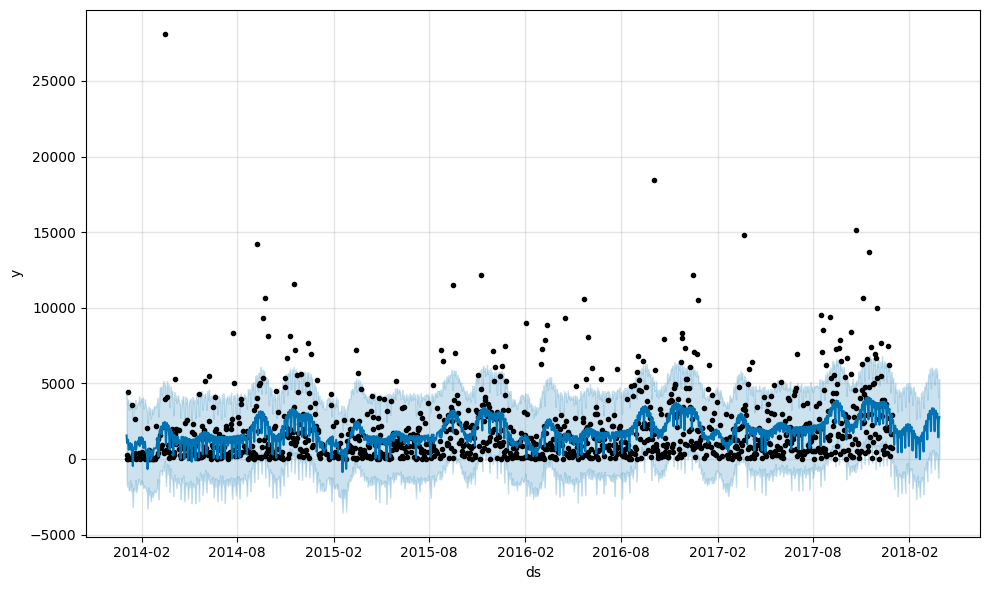

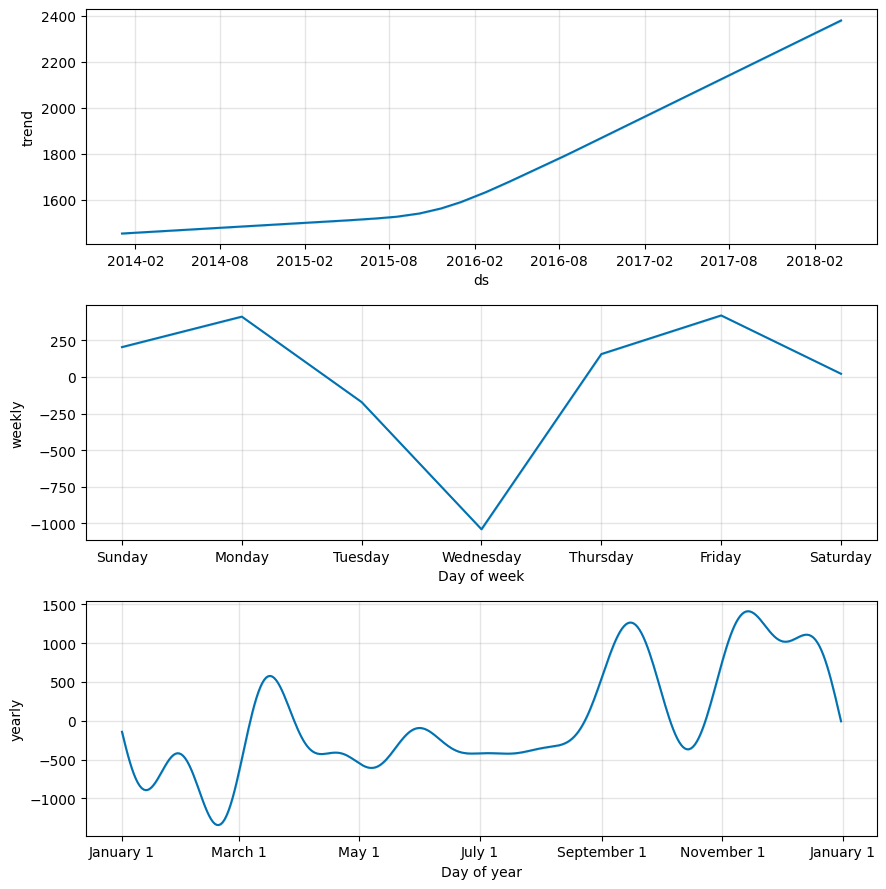

In [15]:
model.plot(forecast)
plt.show()

model.plot_components(forecast)
plt.show()


## 🧪 Splitting Data into Training and Testing Sets

To evaluate the forecasting model, the dataset is divided into:
- **Training data** → used to train the model
- **Testing data** → used to validate the model’s predictions

Since this is time series data, the split is done **chronologically**, not randomly.


In [16]:
train = prophet_df[:-30]
test = prophet_df[-30:]

## 📏 Model Evaluation

To evaluate the model performance, we compare predicted values with actual sales data for the last 30 days.

Error metrics such as **Mean Absolute Error (MAE)** are used to measure forecast accuracy.


In [17]:
test_forecast = model.predict(test[['ds']])
mae = mean_absolute_error(test['y'], test_forecast['yhat'])

print("MAE:", mae)

MAE: 1839.6405115188313


## 📤 Exporting Forecast Results

The final forecast results are exported as a CSV file.

This file will be used in **Power BI** to create an interactive dashboard for business analysis and decision-making.


In [18]:
forecast_output = forecast[['ds','yhat','yhat_lower','yhat_upper']]
forecast_output.to_csv("superstore_sales_forecast.csv", index=False)